In [1]:
# # If f3dasm is not found, install the correct version from pip
# try:
#     import f3dasm
# except ModuleNotFoundError:
#     %pip install f3dasm==0.2.91 --quiet
#     import f3dasm

In [2]:
# # Check if you got the right version, otherwise uninstall this version!

# import os

# if f3dasm.__version__ != '0.2.91':
#     %pip uninstall -y f3dasm
#     os._exit(00)
#     # The kernel will be restarted and you need to run the notebook again!
    
# f3dasm.show_versions()

In [3]:
import f3dasm

2023-03-30 18:41:34,187 - Imported f3dasm (version: 0.2.98)
2023-03-30 18:41:35.005312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 18:41:35.163350: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-30 18:41:35.881244: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:

Import third-party libraries:

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

Define the seed of the random number generator:

Define the design space with `make_nd_continuous_design()`:

In [5]:
DIMENSIONALITY = 1
NOISE = 0.1
SEED = 42
# design = f3dasm.make_nd_continuous_design(bounds=np.tile([0.,1.], (dimensionality, 1)),dimensionality=dimensionality)

Create a sampler:

In [24]:
N_TRAIN = 100 # Number of samples
N_TEST = 1000
LOWER_BOUND = 0.
UPPER_BOUND = 1.
function_class = f3dasm.functions.Ackley
f = function_class(dimensionality=DIMENSIONALITY, scale_bounds=np.tile([LOWER_BOUND, UPPER_BOUND], (DIMENSIONALITY,1)), seed=SEED, offset=False)
sample_data = f3dasm.data.benchmarkfunction_data.BenchmarkFunctionData(n=N_TRAIN, dimensionality=1, bounds=np.tile([LOWER_BOUND, UPPER_BOUND], (DIMENSIONALITY,1)), function_class=function_class, noise=NOISE, seed=SEED)


X_train = sample_data.get_input_data()
y_train = sample_data.get_labels()


regressor = GaussianProcessRegressor()

regressor.fit(X_train, y_train)

X_test = np.sort(np.random.uniform(LOWER_BOUND, UPPER_BOUND,size=N_TEST)).reshape(-1,1)
y_pred = regressor.predict(X_test)
y_true = f(X_test)

mse = mean_squared_error(y_true, y_pred)
mse

5.077132864402118

Create an analytical benchmark function and evaluate the samples:

Create regressor from the `scikit-learn` library and fit it with the `samples`:

`fit()` the regressor. The regressor requires the `X` and `y` values as `numpy`-arrays

LinearRegression()

23.260677248358498

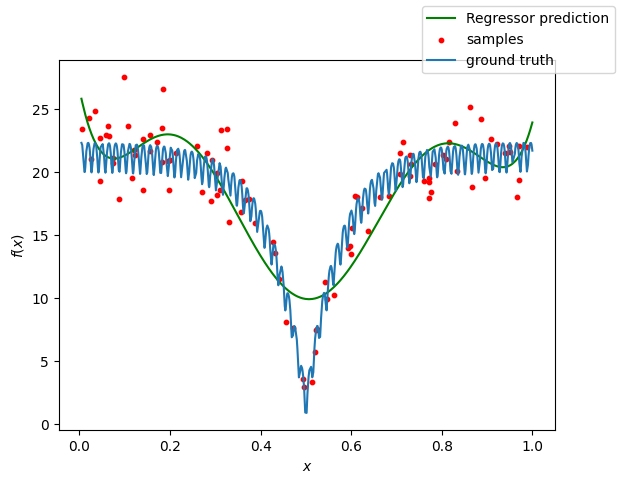

In [25]:
fig, ax = plt.figure(), plt.axes()

ax.plot(X_test, y_pred, label='Regressor prediction', c='green')
ax.scatter(X_train, y_train, label='samples', color='red', s=10)
ax.plot(X_test, f(X_test), label='ground truth')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
fig.legend()